### <font color=darkred> <b> Análise Estatística Para Data Science com Linguagem Python </b> </font>

### <font color=darkblue> <b> Modelagem Estatística de Séries Temporais </b> </font>

### <font color=darkgreen> <b> Lab 2 - Parte 2 - Modelagem Preditiva - Forecasting </b> </font>

#### <font color=darkblue> <b> Modelo ARIMA e SARIMAX </b> </font>


A  modelagem  estatística  de  séries  temporais  é  uma  técnica  que  envolve  o desenvolvimento de modelos matemáticos que descrevem fenômenos observados ao longo do tempo. 

Esses modelos são usados para entender os padrões nas séries temporais, fazer previsões sobre o futuro, ou testar teorias científicas sobre o mecanismo gerador dos dados.  As séries temporais são conjuntos de observações ordenadas em intervalos de tempo regulares. Exemplos  comuns  de  séries  temporais  incluem  os  preços  diários  de  ações,  as temperaturas mensais médias em uma cidade ou o PIB anual de um país.

Existem muitos tipos diferentes de modelos de séries temporais, incluindo:

**Modelos de Média Móvel (MA)**: Esses modelos assumem que o valor atual da série é uma **função dos termos de erro das observações passadas**.

**Modelos Autoregressivos (AR)**: Estes modelos assumem que o valor atual da série é uma **função dos valores passados**.

**Modelos Autoregressivos  de Média Móvel  (ARMA)**:  Estes  são  uma  combinação  de modelos AR e MA.

**Modelos Autoregressivos Integrados de Média Móvel (ARIMA)**: Estes são uma extensão dos  modelos  ARMA  que  também  **incluem  a  diferenciação da  série  temporal  para  torná-la estacionária**  (i.e., com média e variância constantes ao longo do tempo).

**Modelos SARIMAX**: O modelo SARIMAX é uma extensão do modelo ARIMA. O "S" de SARIMAX representa a SAZONALIDADE, o "AR" representa o componente autoregressivo, o "I" representa o componente integrado, o "MA" representa o componente de média móvel e o "X" representa VARIÁVEIS EXÓGENAS. Vamos ver o que cada termo significa:

- **Sazonalidade  (S)**:  No  mundo  real,  muitas  séries  temporais  exibem  padrões  que  se repetem em intervalos regulares, como diariamente, mensalmente ou anualmente. Por exemplo, a venda de sorvete pode aumentar no verão e diminuir no inverno todos os anos. Este é um exemplo de um padrão sazonal. O modelo SARIMAX pode capturar esse tipo de comportamento.


- **Autoregressivo (AR)**: Um processo autoregressivo é aquele onde os valores atuais de uma série temporal são uma soma ponderada de valores passados mais um erro.


- **Integrado (I)**: A integração em uma série temporal é a ideia de diferenciar a série para torná-la estacionária (ou seja, com média e variância constantes ao longo do tempo). O termo "integrado" refere-se ao número de vezes que a série precisa ser diferenciada para se tornar estacionária.


- **Média Móvel (MA)**: Um processo de média móvel é aquele onde os valores atuais de uma série temporal são uma soma ponderada de termos de erro passados.


- **Exógeno (X)**: Variáveis exógenas são variáveis que estão fora do modelo mas são usadas como entrada para o modelo. Por exemplo, se você estiver modelando vendas diárias em uma loja, você pode incluir a temperatura como uma variável exógena porque ela pode afetar as vendas mesmo que não seja uma parte direta do processo de vendas.

Por todas essas razões, o modelo SARIMAX é uma ferramenta muito poderosa para a modelagem de séries temporais. Ele é capaz de modelar uma variedade de comportamentos de séries temporais e pode incorporar informações de outras variáveis além dos próprios valores passados da série.
A escolha do modelo depende da natureza dos dados e do propósito da análise. Para escolher e ajustar esses modelos, podemos usar uma variedade de técnicas, incluindo a função de autocorrelação, a função de autocorrelação parcial, o critério de informação de Akaike (AIC), o critério de informação bayesiano (BIC), entre outros.

### <font color=darkred> <b> Instalando e Carregando Pacotes </b> </font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.pyplot import figure

# Imports para modelagem preditiva
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Filtrando warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

pandas     : 1.5.3
statsmodels: 0.13.2
matplotlib : 3.7.1
sklearn    : 1.0.2
numpy      : 1.23.5



### <font color=darkred> <b> Carregando e Organizando os Dados </b> </font>

In [5]:
# Carrega os dados
dados_treino = pd.read_csv("dados/dataset_treino.csv")
dados_teste = pd.read_csv("dados/dataset_teste.csv")

Vamos fazer algumas transformações nos dados para criar o modelo.

In [6]:
# Converte a coluna data para o tipo correto
dados_treino['data'] = pd.to_datetime(dados_treino.data, format = '%d-%m-%Y %H:%M')

In [7]:
# Converte a coluna data para o tipo correto
dados_teste['data'] = pd.to_datetime(dados_teste.data, format = '%d-%m-%Y %H:%M')

In [8]:
# Definimos o índice do dataset
dados_treino.index = dados_treino['data']

In [9]:
# Definimos o índice do dataset
dados_teste.index = dados_teste['data']

In [10]:
# Removemos a coluna ID, pois ela não é relevante neste caso
dados_treino.drop('id', axis = 1, inplace = True)

In [11]:
# Removemos a coluna data, pois ela não é relevante neste caso
dados_treino.drop('data', axis = 1, inplace = True)

In [12]:
# Variável target 
target = dados_treino['veiculos_produzidos']

In [13]:
dados_treino.head()

,veiculos_produzidos
data,
2020-08-25 00:00:00,8
2020-08-25 01:00:00,2
2020-08-25 02:00:00,6
2020-08-25 03:00:00,2
2020-08-25 04:00:00,2


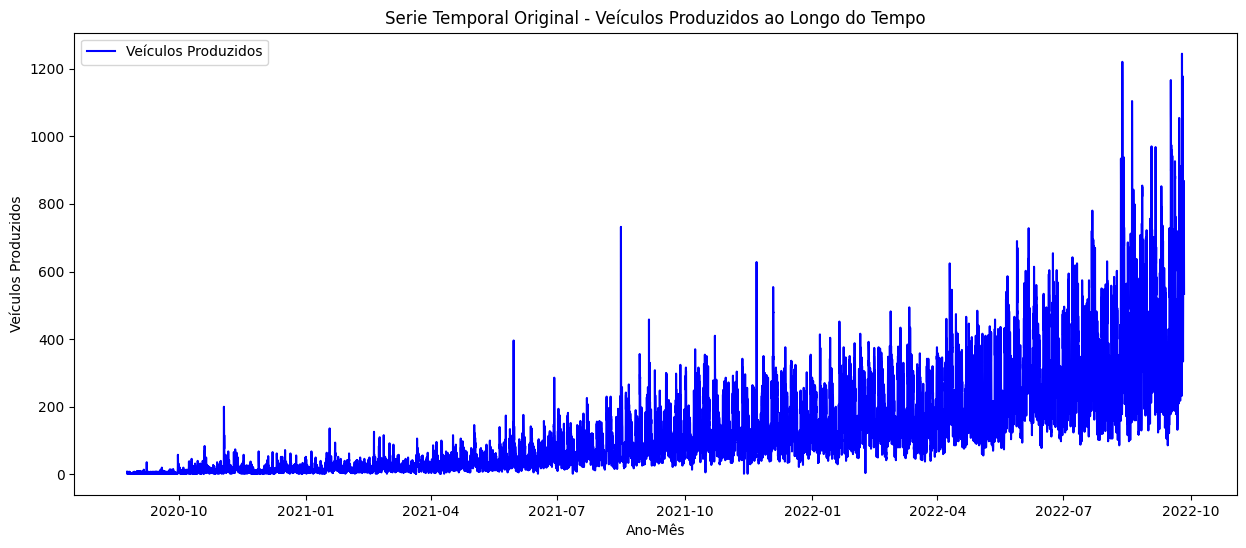

In [14]:
# Plot
figure(figsize = (15, 6))
plt.title("Serie Temporal Original - Veículos Produzidos ao Longo do Tempo")
plt.plot(target, label = "Veículos Produzidos", color = 'blue')
plt.xlabel("Ano-Mês")
plt.ylabel("Veículos Produzidos")
plt.legend(loc = "best")

Já sabemos que a série é estacionária. Vamos direto para a modelagem.

### <font color=darkred> <b> Pré-Processamento </b> </font>

In [15]:
#Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.
# Os dados de treino serão divididos em dados de treino e validação.
# Observe que os registros são separados em ordem cronológica.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

In [16]:
df_treino.shape

(16057, 1)

In [17]:
df_valid.shape

(2230, 1)

In [18]:
# Aplicando transformação de log (colocando os dados na mesma escala, o que é suposição dos modelos ARIMA)
# Passo diferente do que fizemos nos smoothing anteriores, não precisamos deixar os dados na mesma escala anteriormente
df_treino_log = np.log(df_treino['veiculos_produzidos']) 

## <font color=darkblue> <b> Forecasting - Modelagem Preditiva Para Séries Temporais </b> </font>

Em Estatística e Econometria, e em particular na análise de séries temporais, **um modelo de média móvel integrada auto-regressiva (ARIMA) é uma generalização de um modelo de média móvel auto-regressiva (ARMA).** 

Ambos os modelos são ajustados a dados de séries temporais para melhor entender os dados ou para prever pontos futuros na série (previsão). Os modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não estacionariedade, onde uma etapa inicial de diferenciação (correspondente à parte "integrada" do modelo) pode ser aplicada uma ou mais vezes para eliminar a não estacionariedade. 

A parte AR do ARIMA indica que a variável de interesse em evolução é regredida com seus próprios valores defasados (isto é, anteriores). A parte MA indica que o erro de regressão é na verdade uma combinação linear de termos de erro cujos valores ocorreram contemporaneamente e em vários momentos no passado. O I (para "integrado") indica que os valores dos dados foram substituídos pela diferença entre seus valores e os valores anteriores (e esse processo de diferenciação pode ter sido executado mais de uma vez). O objetivo de cada um desses recursos é fazer com que o modelo ajuste os dados da melhor maneira possível.

Modelos ARIMA não sazonais são geralmente designados ARIMA(p, d, q), em que os **parâmetros p, d e q são números inteiros não negativos:

- **p é a ordem (número de intervalos de tempo) do modelo autoregressivo,** 
- **d é o grau de diferenciação (o número de vezes que os dados tiveram valores passados subtraídos) e**
- **q é a ordem do modelo de média móvel.**

Modelos ARIMA sazonais são geralmente designados ARIMA (p, d, q) (P, D, Q) m, em que m refere-se ao número de períodos em cada season e os maiúsculos P, D, Q referem-se ao autorregressivo, diferenciado, e termos da média móvel da parte sazonal do modelo ARIMA.

Quando dois dos três termos são zeros, o modelo pode ser referido com base no parâmetro diferente de zero, eliminando "AR", "I" ou "MA" da sigla que descreve o modelo. Por exemplo, ARIMA (1,0,0) é AR (1), ARIMA (0,1,0) é I (1) e ARIMA (0,0,1) é MA (1).

## <font color=darkgreen> <b> Implementando a Estratégia 4 de Forecasting - Modelo ARIMA </b> </font>

- ARIMA é uma sigla que significa AutoRegressive Integrated Moving Average. 
- É um modelo estatístico amplamente utilizado na modelagem de séries temporais para prever valores futuros baseados em observações passadas. 
- O modelo ARIMA **combina elementos de modelos autorregressivos (AR), diferenciação (I) e médias móveis (MA) para lidar com tendências, sazonalidades e irregularidades na série temporal.** 
- O modelo é especificado por **três parâmetros inteiros (p, d, q)**, que representam o <font color = darkred> **número de termos autorregressivos, o número de diferenciações necessárias para tornar a série estacionária e o número de termos de média móvel**,</font> respectivamente. Otrabalho é encontrar esses parâmetros que chamamos de **Ordem**


- O ARIMA é frequentemente usado com sucesso em muitos tipos de séries temporais e é considerado um dos modelos mais versáteis e robustos para previsão de séries temporais.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html

In [19]:
# Cria o Modelo ARIMA

# Definimos por experimentação a escolha dos hiperparâmetros: (ordem)

# p = 2 - nº de intervalos de tempo
# d = 1 - qrau de diferenciação
# q = 0 - ordem do modelo de média móvel

# Modelo, usou df_treino com a trasnformação de log, frequencia hora, pois nossa série é horária
modelo_AR = ARIMA(df_treino_log, order = (2, 1, 0), freq = 'H')

In [20]:
# Treinamento
# Em treino esperamos q o modelo aprenda o relacionamento matemático entre as variaveis
modelo_v3 = modelo_AR.fit() 

In [21]:
# Dados Reais e Previsões (ainda usando dados de treino)
dados_reais = df_treino_log
previsoes_v3 = modelo_v3.fittedvalues

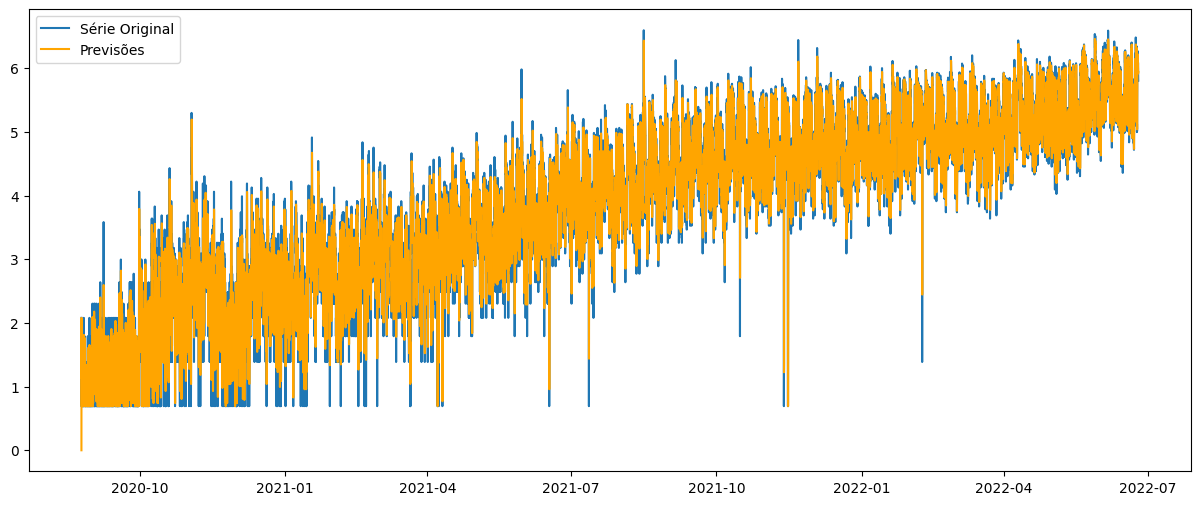

In [22]:
# Plot
figure(figsize = (15, 6))
plt.plot(dados_reais, label = 'Série Original') 
plt.plot(previsoes_v3, color = 'orange', label = 'Previsões') 
plt.legend(loc = 'best') 
plt.show()

In [23]:
# Sumário do Modelo 
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     veiculos_produzidos   No. Observations:                16057
Model:                  ARIMA(2, 1, 0)   Log Likelihood               -8119.356
Date:                 Thu, 25 Jul 2024   AIC                          16244.711
Time:                         08:41:35   BIC                          16267.763
Sample:                     08-25-2020   HQIC                         16252.334
                          - 06-25-2022                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3419      0.005    -68.096      0.000      -0.352      -0.332
ar.L2         -0.0695      0.006    -11.737      0.000      -0.081      -0.058
sigma2         0.1610      0.001    158.760      0.000       0.159       0.163
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12378.93
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Agora vamos fazer previsões com o modelo treinado usando dados de validação.

In [24]:
# Você sabe que as transformações aplicadas nos dados de treino devem ser aplicadas nos dados de validação/teste.
# Por isso nao pode esquecer a trasnformaçao log para validação tb!!
df_valid_log = np.log(df_valid['veiculos_produzidos'])

In [25]:
# O parâmetro alfa representa o intervalo de confiança, nesse caso, 95%
# len pega o comprimento do objeto
# Len diz ao modelo: faça a previsão dos valores no total que temos de datas para df_valid, ao invés, de cada valor
# Alpha 0,5 para intervalo de confiança de 95%
df_previsoes_v3 = modelo_v3.forecast(len(df_valid_log), alpha = 0.05) 

In [26]:
df_previsoes_v3.shape

(2230,)

In [27]:
# Está com transformação de log, por isso previsão de 5.85... precisa reverter para valores reais
df_previsoes_v3.head()

2022-06-25 01:00:00    5.853056
2022-06-25 02:00:00    5.847868
2022-06-25 03:00:00    5.846309
2022-06-25 04:00:00    5.847203
2022-06-25 05:00:00    5.847006
Freq: H, Name: predicted_mean, dtype: float64

In [28]:
# Criamos a série para o gráfico
fc_series = pd.Series(df_previsoes_v3, index = df_valid_log.index)

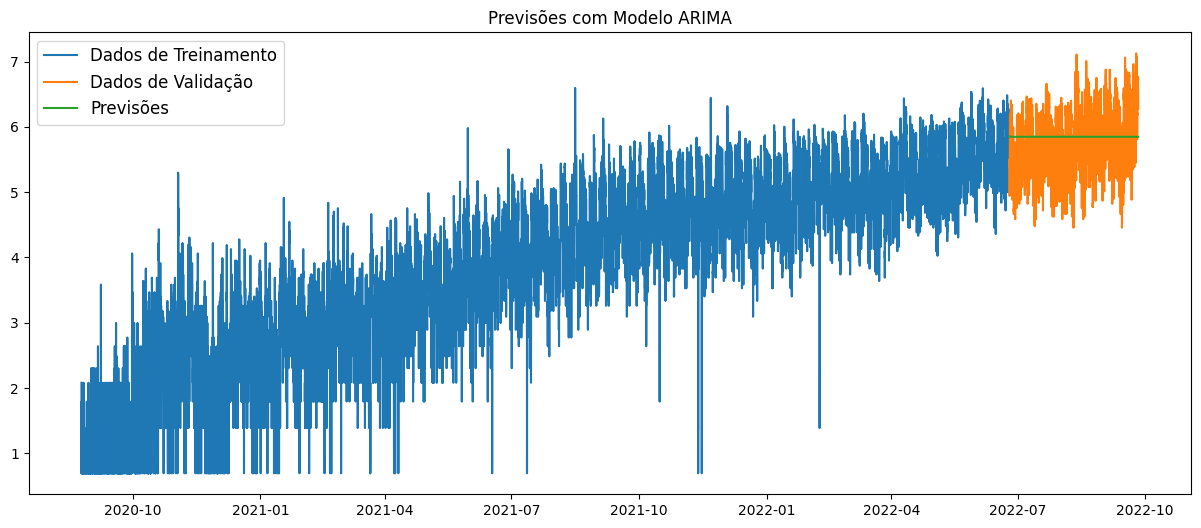

In [29]:
# O modelo aprendeu com os dados em azul, e fez a previsões com os dados em laranja a previsão é a linha verde!!
# Plot
figure(figsize = (15, 6))
plt.plot(df_treino_log, label = 'Dados de Treinamento')
plt.plot(df_valid_log, label = 'Dados de Validação')
plt.plot(fc_series, label = 'Previsões')
plt.title('Previsões com Modelo ARIMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

Pronto! Temos a previsão da nossa série com o modelo criado. Vamos calcular o erro do modelo.

In [30]:
# Replace de valores NaN por 0
# Precisa fazer porque o ARIMA aplica diferenciação oq pode causar NaN
fc_series = fc_series.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [31]:
# Define valor real e valor previsto
# Usando df_valid_log!!
y_true = df_valid_log
y_pred = fc_series

In [32]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

0.5136328974916258


Reduzimos de forma considerável o erro do nosso modelo. Não é por acaso que Modelos ARIMA fazem tanto sucesso. 

Você pode estar estranhando o gráfico, mas o que fizemos foi usar a série com a transformação de log, o que muda a escala dos dados. Porém os dados são os mesmos. Daqui a pouco veremos como fazer a inversa da transformação de log.

## <font color=darkgreen> <b> Implementando a Estratégia 5 de Forecasting - Modelo SARIMAX </b> </font>

- SARIMAX é uma sigla que significa Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors. 
- É uma extensão do modelo ARIMA que permite a inclusão de variáveis exógenas (regressores) para melhorar a previsão. 


- Além dos três parâmetros inteiros (p, d, q) que especificam o comportamento autorregressivo, integrado e de média móvel da série temporal, o SARIMAX também inclui parâmetros adicionais que especificam a sazonalidade da série e a influência das variáveis exógenas(por ex. feriados). 


- O SARIMAX é frequentemente usado em aplicações em que a **série temporal é fortemente influenciada por fatores sazonais ou por outras variáveis que podem ser incluídas como regressores**. Ele é amplamente utilizado para previsão em muitos setores, como finanças, economia, varejo e produção.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [33]:
# Cria o modelo
# Agora precisa definir mais 4 hiper parametros do seasonal order alem dos 3 que tinha no ARIMA
# trend= "n", none. é para não incluir o componente de tendência
# a dificuldade está em encontrar a combinação entre trend X order X seazonal_order :-)))
modelo_SARIMAX = SARIMAX(df_treino_log, trend = 'n', order = (6,1,0), seasonal_order = (0,1,1,12))

In [34]:
# Treinamento do modelo
modelo_v4 = modelo_SARIMAX.fit(disp = True)

In [35]:
# Dados Reais e Previsões (em treino)
dados_reais = df_treino_log
previsoes_v4 = modelo_v4.fittedvalues

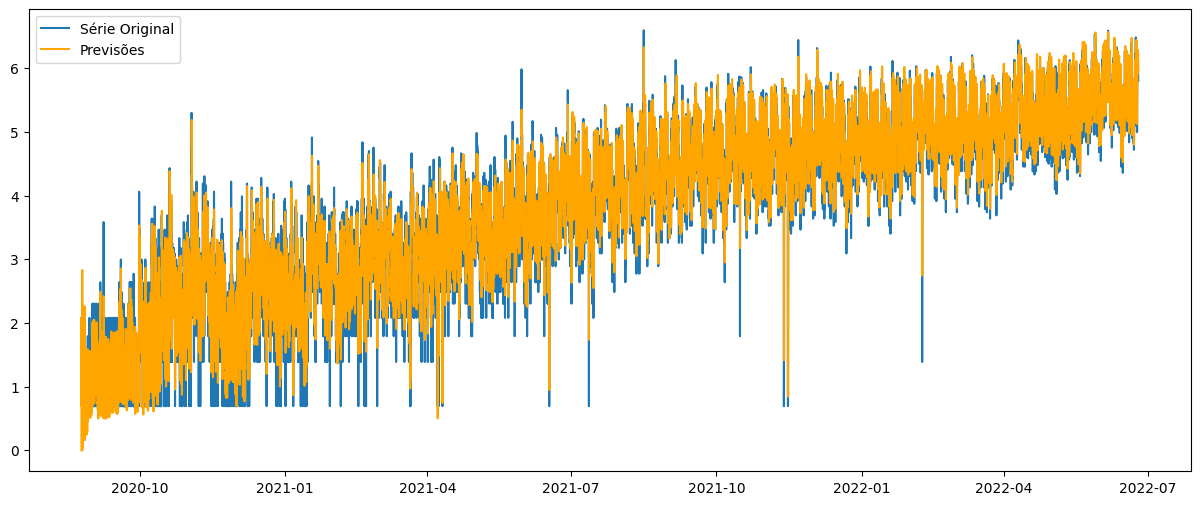

In [36]:
# Plot
figure(figsize = (15, 6))
plt.plot(dados_reais, label = 'Série Original') 
plt.plot(previsoes_v4, color = 'orange', label = 'Previsões') 
plt.legend(loc = 'best') 
plt.show()

In [37]:
# Sumário do Modelo 
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                  veiculos_produzidos   No. Observations:                16057
Model:             SARIMAX(6, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -7380.094
Date:                              Thu, 25 Jul 2024   AIC                          14776.188
Time:                                      08:41:58   BIC                          14837.652
Sample:                                  08-25-2020   HQIC                         14796.514
                                       - 06-25-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4178      0.005    -85.102      0.000      -0.427      -0.408
ar.L2         -0.1444      0.006    -22.494      0.000      -0.157      -0.132
ar.L3         -0.0446      0.007     -6.651      0.000      -0.058      -0.031
ar.L4         -0.0097      0.006     -1.584      0.113      -0.022       0.002
ar.L5          0.0146      0.006      2.400      0.016       0.003       0.027
ar.L6         -0.0011      0.006     -0.178      0.859      -0.013       0.011
ma.S.L12      -0.9965      0.001   -985.548      0.000      -0.998      -0.995
sigma2         0.1464      0.001    158.158      0.000       0.145       0.148
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             15818.08
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
# O parâmetro alfa representa o intervalo de confiança, nesse caso, 95%
# pegou o comprimento(len) da validação com log
df_previsoes_v4 = modelo_v4.forecast(len(df_valid_log), alpha = 0.05) 

In [39]:
df_previsoes_v4.shape

(2230,)

In [40]:
# Cria a série para o gráfico
fc_series = pd.Series(df_previsoes_v4, index = df_valid_log.index)

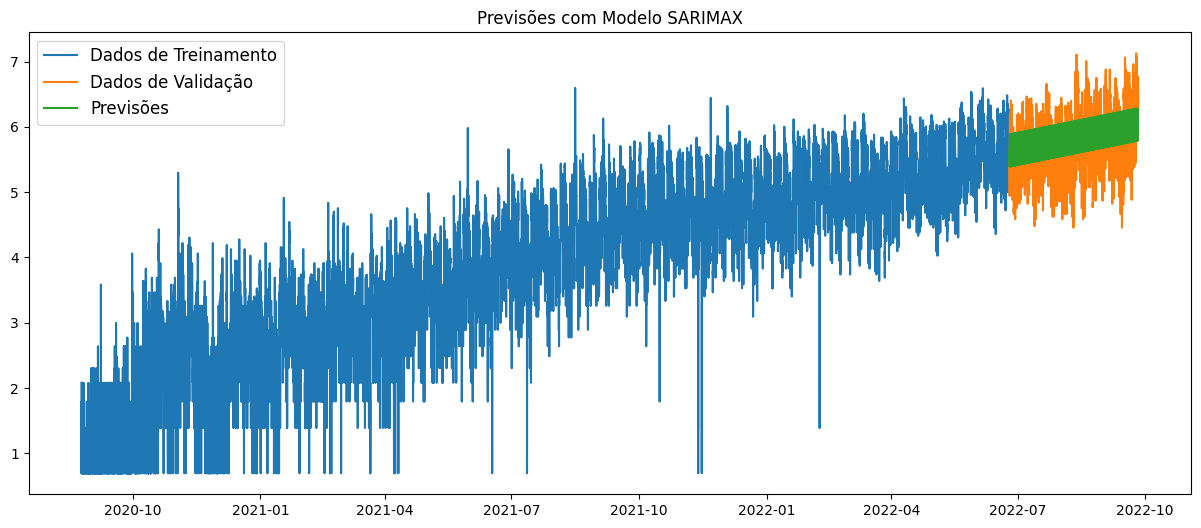

In [41]:
# Plot
figure(figsize = (15, 6))
plt.plot(df_treino_log, label = 'Dados de Treinamento')
plt.plot(df_valid_log, label = 'Dados de Validação')
plt.plot(fc_series, label = 'Previsões')
plt.title('Previsões com Modelo SARIMAX')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

A linha verde captou a tendencia, no caso de crescimento. Isto é, o numero de veiculos produzidos aumentou ao longo do tempo.
A previsão Naive, por exemplo, mostrou linha horizontal, claro, por repete o ultimo valor.

In [42]:
# Replace de valores NaN por 0
fc_series = fc_series.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [43]:
# Define valor real e valor previsto
y_true = df_valid_log
y_pred = fc_series

In [44]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

0.4634339975433134


Chegamos à melhor versão do nosso modelo. Vamos usá-lo para fazer as previsões com dados de teste.

### <font color=darkred> <b> Previsões com Novos Dados </b> </font>

In [45]:
# dados teste só pode ter a data! Pq queremos exatamente a previsão dos carros produzidos
dados_teste.head()

,id,data
data,,
2022-09-26 00:00:00,18288,2022-09-26 00:00:00
2022-09-26 01:00:00,18289,2022-09-26 01:00:00
2022-09-26 02:00:00,18290,2022-09-26 02:00:00
2022-09-26 03:00:00,18291,2022-09-26 03:00:00
2022-09-26 04:00:00,18292,2022-09-26 04:00:00


In [46]:
# Vamos fazer a previsão para uma janela de 30 horas
# indice 0, igual a primeiro registro até o 30 exclusivo.. vai de 0 a 29 somando 30
previsoes = modelo_v4.predict(start = dados_teste.data[0], end = dados_teste.data[30], dynamic = False)

In [47]:
type(previsoes)

pandas.core.series.Series

In [48]:
# Lembre-se que está com transformação de log! np.log.. precisa reverter.. np.exp. Fofo, né? rs!
# obs - Poderia usar de 0 a 30 tb, nos indice... mas mantive como na aula
previsoes[1:30]

2022-09-26 01:00:00    6.106457
2022-09-26 02:00:00    6.053935
2022-09-26 03:00:00    5.958873
2022-09-26 04:00:00    5.854595
2022-09-26 05:00:00    5.790944
2022-09-26 06:00:00    5.837258
2022-09-26 07:00:00    5.936081
2022-09-26 08:00:00    6.011456
2022-09-26 09:00:00    6.109186
2022-09-26 10:00:00    6.256616
2022-09-26 11:00:00    6.284681
2022-09-26 12:00:00    6.256278
2022-09-26 13:00:00    6.108609
2022-09-26 14:00:00    6.056087
2022-09-26 15:00:00    5.961025
2022-09-26 16:00:00    5.856746
2022-09-26 17:00:00    5.793096
2022-09-26 18:00:00    5.839410
2022-09-26 19:00:00    5.938233
2022-09-26 20:00:00    6.013608
2022-09-26 21:00:00    6.111338
2022-09-26 22:00:00    6.258768
2022-09-26 23:00:00    6.286833
2022-09-27 00:00:00    6.258430
2022-09-27 01:00:00    6.110761
2022-09-27 02:00:00    6.058239
2022-09-27 03:00:00    5.963177
2022-09-27 04:00:00    5.858898
2022-09-27 05:00:00    5.795248
Freq: H, Name: predicted_mean, dtype: float64

Como o modelo foi treinado com dados que receberam transformação de log, precisamos calcular a inversa da transformação para extrair as previsões na mesma unidade da série temporal.

In [49]:
# Inversa da transformação de log
# previsão para 30 horas
np.exp(previsoes[1:30])

2022-09-26 01:00:00    448.746057
2022-09-26 02:00:00    425.785183
2022-09-26 03:00:00    387.173513
2022-09-26 04:00:00    348.833432
2022-09-26 05:00:00    327.322018
2022-09-26 06:00:00    342.838060
2022-09-26 07:00:00    378.448914
2022-09-26 08:00:00    408.077163
2022-09-26 09:00:00    449.972420
2022-09-26 10:00:00    521.451188
2022-09-26 11:00:00    536.293121
2022-09-26 12:00:00    521.274970
2022-09-26 13:00:00    449.712741
2022-09-26 14:00:00    426.702405
2022-09-26 15:00:00    388.007559
2022-09-26 16:00:00    349.584886
2022-09-26 17:00:00    328.027132
2022-09-26 18:00:00    343.576598
2022-09-26 19:00:00    379.264164
2022-09-26 20:00:00    408.956239
2022-09-26 21:00:00    450.941747
2022-09-26 22:00:00    522.574493
2022-09-26 23:00:00    537.448398
2022-09-27 00:00:00    522.397895
2022-09-27 01:00:00    450.681508
2022-09-27 02:00:00    427.621603
2022-09-27 03:00:00    388.843401
2022-09-27 04:00:00    350.337958
2022-09-27 05:00:00    328.733765
Freq: H, Name:

### The End